In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA + Feature engineering

In [172]:
data = pd.read_csv("../datasets/alzheimer/alzheimer.csv")
data

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [173]:
data.isna().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

<Axes: xlabel='Group', ylabel='count'>

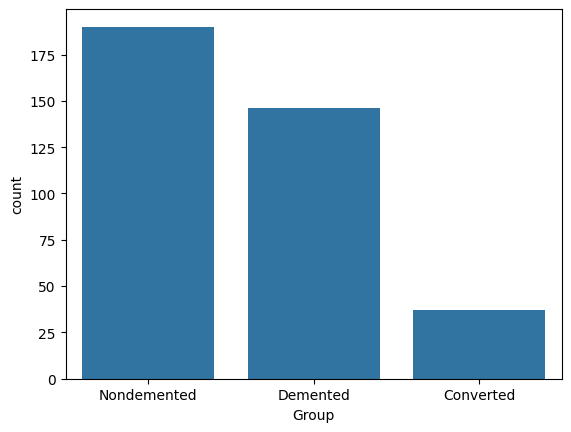

In [174]:
sns.countplot(data, x="Group")

<Axes: xlabel='Group', ylabel='count'>

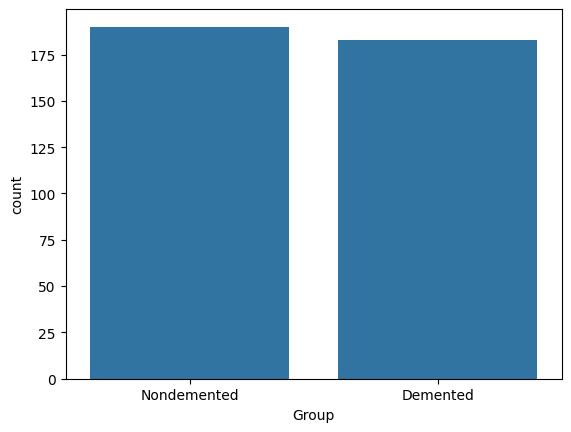

In [175]:
data.loc[data.Group == "Converted", "Group"] = "Demented" #Trasnformé converted a demented.
sns.countplot(data, x="Group") #Balanced dataset

In [176]:
data.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


<Axes: xlabel='CDR'>

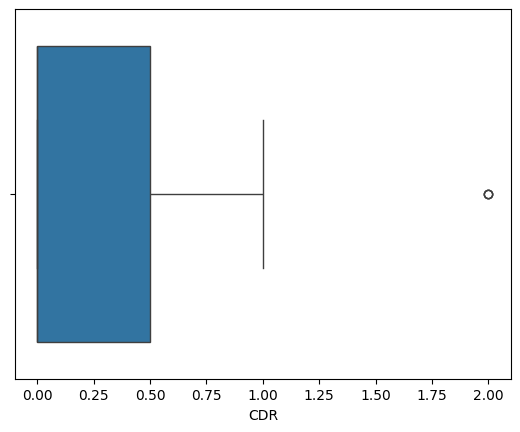

In [177]:
sns.boxplot(data, x = "CDR")

<Axes: >

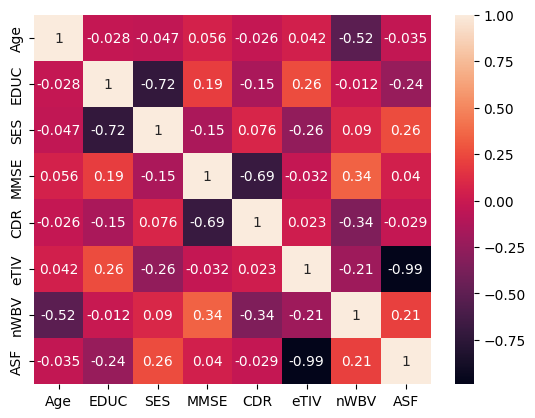

In [178]:
sns.heatmap(data.drop(columns=["M/F", "Group"]).corr(), annot=True)

In [179]:
data.loc[data["Group"] == "Nondemented", "label"] = 0
data.loc[data["Group"] == "Demented", "label"] = 1
data.loc[data["M/F"] == "M", "sex"] = 0
data.loc[data["M/F"] == "F", "sex"] = 1
data = data.drop(columns=["Group", "M/F"])
data

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,label,sex
0,87,14,2.0,27.0,0.0,1987,0.696,0.883,0.0,0.0
1,88,14,2.0,30.0,0.0,2004,0.681,0.876,0.0,0.0
2,75,12,NaN,23.0,0.5,1678,0.736,1.046,1.0,0.0
3,76,12,NaN,28.0,0.5,1738,0.713,1.010,1.0,0.0
4,80,12,NaN,22.0,0.5,1698,0.701,1.034,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
368,82,16,1.0,28.0,0.5,1693,0.694,1.037,1.0,0.0
369,86,16,1.0,26.0,0.5,1688,0.675,1.040,1.0,0.0
370,61,13,2.0,30.0,0.0,1319,0.801,1.331,0.0,1.0
371,63,13,2.0,30.0,0.0,1327,0.796,1.323,0.0,1.0


In [180]:
from sklearn.feature_selection import mutual_info_classif #Feature selection usando mutual information

In [181]:
sub_data = data.dropna() #Datos eliminados

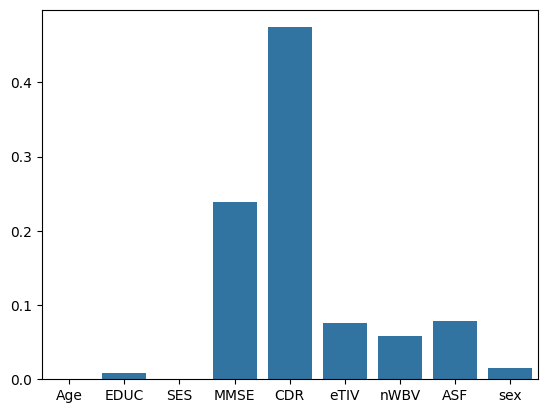

In [182]:
mi = mutual_info_classif(sub_data.drop(columns=["label"]), sub_data.label, random_state=1) #Obtener mutual information Stochastic.
#setear random state
sns.barplot(x = np.arange(len(mi)), y = mi)
plt.xticks(np.arange(len(mi)), sub_data.drop(columns=["label"]))
plt.show()

In [183]:
sub_data.drop(columns="label")

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,sex
0,87,14,2.0,27.0,0.0,1987,0.696,0.883,0.0
1,88,14,2.0,30.0,0.0,2004,0.681,0.876,0.0
5,88,18,3.0,28.0,0.0,1215,0.710,1.444,1.0
6,90,18,3.0,27.0,0.0,1200,0.718,1.462,1.0
7,80,12,4.0,28.0,0.0,1689,0.712,1.039,0.0
...,...,...,...,...,...,...,...,...,...
368,82,16,1.0,28.0,0.5,1693,0.694,1.037,0.0
369,86,16,1.0,26.0,0.5,1688,0.675,1.040,0.0
370,61,13,2.0,30.0,0.0,1319,0.801,1.331,1.0
371,63,13,2.0,30.0,0.0,1327,0.796,1.323,1.0


In [184]:
data = data.drop(columns=["Age", "EDUC","SES", "sex" ])
data

,MMSE,CDR,eTIV,nWBV,ASF,label
0,27.0,0.0,1987,0.696,0.883,0.0
1,30.0,0.0,2004,0.681,0.876,0.0
2,23.0,0.5,1678,0.736,1.046,1.0
3,28.0,0.5,1738,0.713,1.010,1.0
4,22.0,0.5,1698,0.701,1.034,1.0
...,...,...,...,...,...,...
368,28.0,0.5,1693,0.694,1.037,1.0
369,26.0,0.5,1688,0.675,1.040,1.0
370,30.0,0.0,1319,0.801,1.331,0.0
371,30.0,0.0,1327,0.796,1.323,0.0


In [185]:
data.isna().sum()

MMSE     2
CDR      0
eTIV     0
nWBV     0
ASF      0
label    0
dtype: int64

In [186]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_validate

In [187]:
X, y = data.drop(columns=["label"]), data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((279, 5), (94, 5), (279,), (94,))

<Axes: >

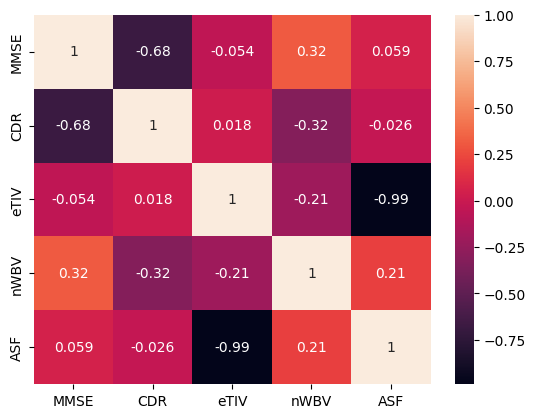

In [188]:
sns.heatmap(X_train.corr(), annot=True)

In [189]:
ki = KNNImputer() #Usamos knn para asignar los valores nulos según sus vecinos.
X_train = ki.fit_transform(X_train)
X_test = ki.transform(X_test)

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [192]:
from sklearn.decomposition import PCA

In [193]:
pca = PCA()
pca.fit(X_train)

PCA()

<Axes: >

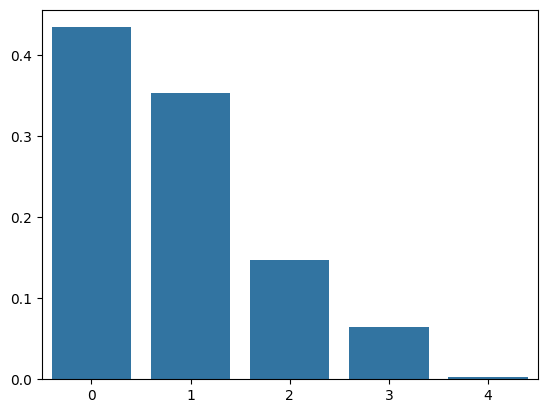

In [194]:
sns.barplot(y =  pca.explained_variance_ratio_, x=np.arange(len(pca.explained_variance_ratio_)))

In [195]:
exp_var = pd.DataFrame(pca.explained_variance_ratio_, columns=["exp_var"])
exp_var.cumsum()

,exp_var
0,0.434013
1,0.786965
2,0.933564
3,0.997685
4,1.000000


In [196]:
pca = PCA(3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [197]:
X_train.shape

(279, 3)

In [198]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train) #Training model
knn.score(X_train, y_train) #Accuracy

0.96415770609319

In [200]:
cross_validate(knn, X_train, y_train)["test_score"].mean()

np.float64(0.938961038961039)

In [201]:
y_pred = knn.predict(X_test) #
y_prob = knn.predict_proba(X_test)

In [202]:
from sklearn.metrics import classification_report

In [203]:
print(classification_report(y_test, y_pred)) #Obtener métricas. 

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93        50
         1.0       0.95      0.89      0.92        44

    accuracy                           0.93        94
   macro avg       0.93      0.92      0.92        94
weighted avg       0.93      0.93      0.93        94

